In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from wordcloud import WordCloud
import seaborn as sns

In [ ]:
df = pd.read_csv(r"instagram_reach.csv")
df.head()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


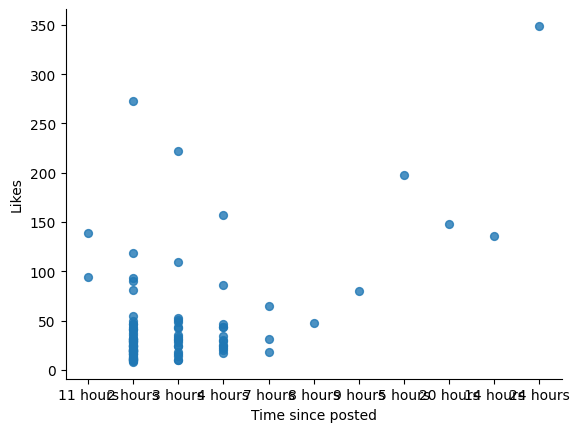

In [ ]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Time since posted', y='Likes', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

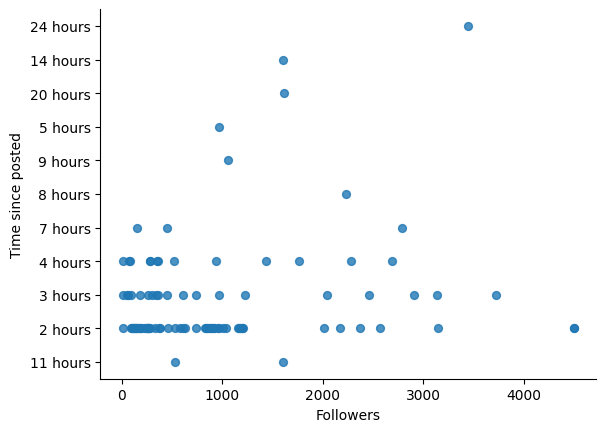

In [ ]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Followers', y='Time since posted', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

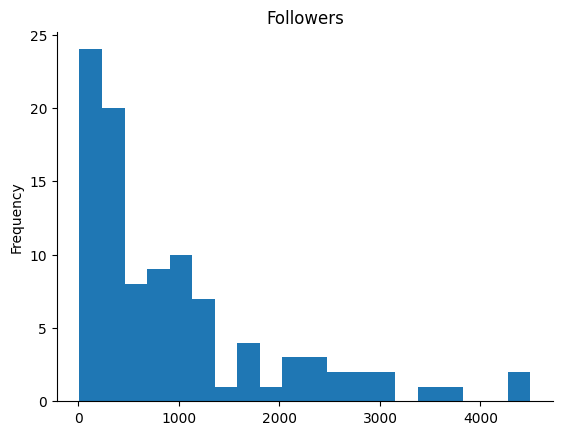

In [ ]:
from matplotlib import pyplot as plt
df['Followers'].plot(kind='hist', bins=20, title='Followers')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         100 non-null    int64 
 1   S.No               100 non-null    int64 
 2   USERNAME           100 non-null    object
 3   Caption            94 non-null     object
 4   Followers          100 non-null    int64 
 5   Hashtags           100 non-null    object
 6   Time since posted  100 non-null    object
 7   Likes              100 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 6.4+ KB


In [ ]:
df['Time since posted'] = df['Time since posted'].str.replace(' hours', '').astype(int)

print(df.isnull().sum())

print(df.describe())


Unnamed: 0           0
S.No                 0
USERNAME             0
Caption              6
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64
       Unnamed: 0        S.No   Followers  Time since posted      Likes
count  100.000000  100.000000   100.00000         100.000000  100.00000
mean     8.940000   16.240000   961.96000           3.460000   46.48000
std      6.639064    7.384286  1014.62567           3.394648   55.08698
min      0.000000    1.000000    11.00000           2.000000    8.00000
25%      4.000000   10.750000   252.75000           2.000000   19.00000
50%      8.000000   16.500000   612.00000           2.000000   29.00000
75%     12.250000   22.250000  1197.00000           3.000000   46.00000
max     26.000000   30.000000  4496.00000          24.000000  349.00000


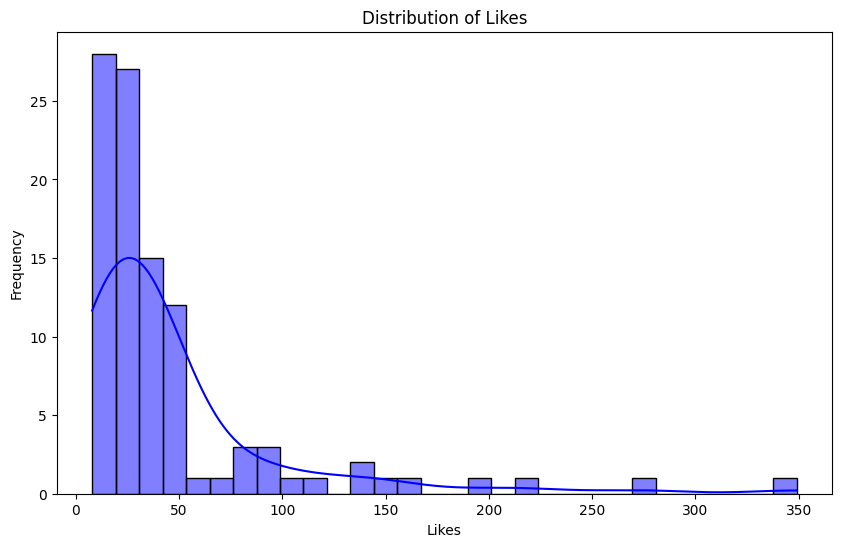

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Likes'], kde=True, color="blue")
plt.title('Distribution of Likes')
plt.xlabel('Likes')
plt.ylabel('Frequency')
plt.show()


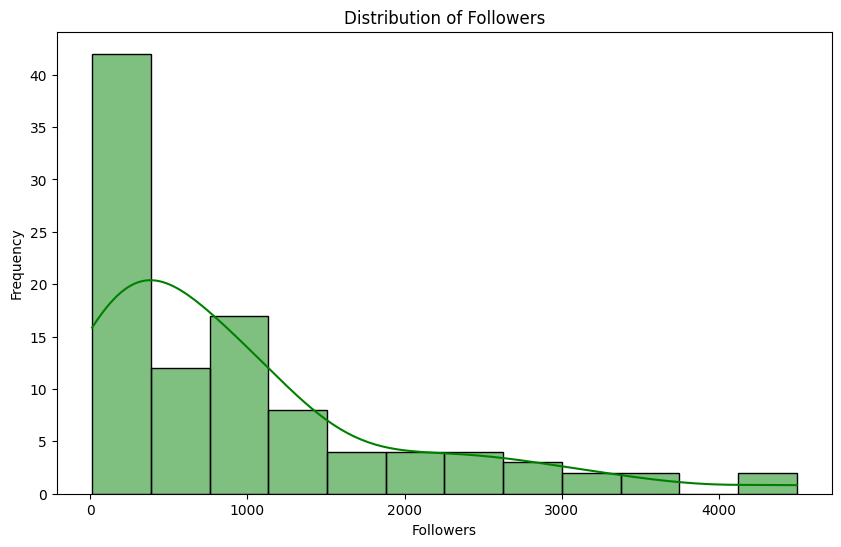

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Followers'], kde=True, color="green")
plt.title('Distribution of Followers')
plt.xlabel('Followers')
plt.ylabel('Frequency')
plt.show()


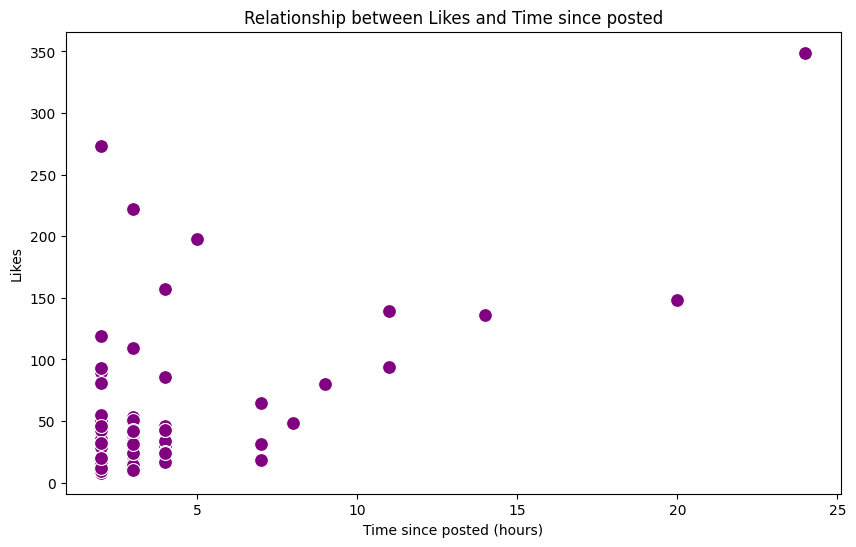

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Time since posted', y='Likes', data=df, s=100, color="purple")
plt.title('Relationship between Likes and Time since posted')
plt.xlabel('Time since posted (hours)')
plt.ylabel('Likes')
plt.show()


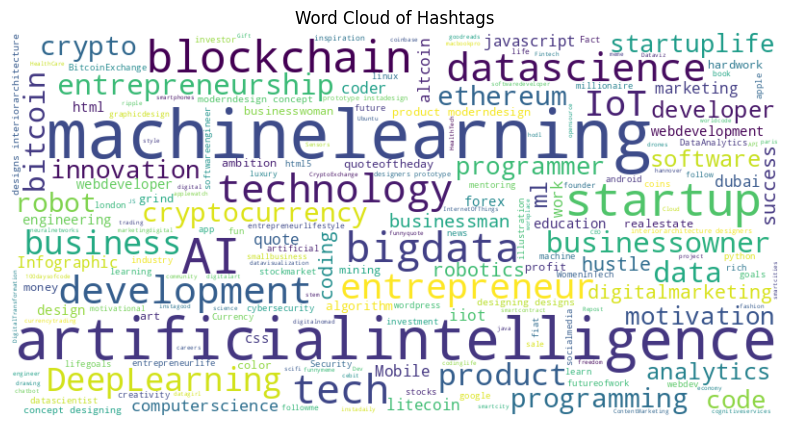

In [ ]:
all_hashtags = ' '.join(hashtag for hashtag in df['Hashtags'])

wordcloud = WordCloud(width=800, height=400, background_color ='white', colormap='viridis').generate(all_hashtags)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Hashtags')
plt.show()
